In [18]:
from modules.client import OffVarianceClient
import modules.utils as utils
from dotenv import dotenv_values

config = dotenv_values('../.env')

client = OffVarianceClient(config.get('OFF_VARIANCE_KEY'), data_path='../data')
games_df = client.get_finished_games()

games_df = utils.filter_correct_games(games_df)
utils.populate_metrics(games_df)

In [19]:
segmented_df = games_df.loc[
(games_df['team1_home_classic_minutes'] >= 90 * 3) & (games_df['team2_away_classic_minutes'] >= 90 * 3) &
(games_df['odds_open_win2'] >= 1.8) & (games_df['odds_open_win2'] <= 2.7) &
(games_df['odds_open_tb25'] >= 1.6) & (games_df['odds_open_tb25'] <= 2)
]

Count: 5166
Open profit: -134.31
Close profit: -218.23000000000005
Open ROI: -0.02599883855981417
Close ROI: -0.04224351529229579
UDI: 0.0140756140840556
AxesSubplot(0.125,0.125;0.775x0.755)


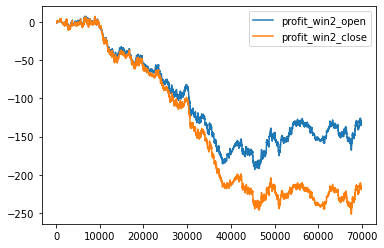

In [20]:
utils.print_away_win_result(segmented_df)

In [21]:
utils.analyze_correlation(segmented_df, 'difference', utils.metrics)

,correlation
expected_difference,0.115390
expected_difference_loc,0.090551
simple_expected_difference,0.066408
simple_expected_difference_loc,0.047515
expected_total_loc,-0.016270
simple_expected_total_value_loc,-0.010716
simple_expected_total_value,-0.003434
expected_total,-0.001749


In [22]:
utils.analyze_avg_udi(segmented_df, utils.metrics, 'udi_win2')

,low,high,diff
expected_difference_loc,-0.279448,-0.564749,0.285301
expected_difference,-0.255777,-0.508824,0.253047
simple_expected_difference_loc,-0.041303,-0.176560,0.135257
simple_expected_difference,-0.280936,-0.415446,0.134510
simple_expected_total_value,5.170706,5.272694,0.101988
expected_total_loc,2.584067,2.671359,0.087292
simple_expected_total_value_loc,5.115582,5.198401,0.082820
expected_total,2.543457,2.624136,0.080678


In [23]:
updated_segmented_df = segmented_df.loc[
(segmented_df['expected_difference_loc'] <= -0.56) & (segmented_df['expected_difference'] <= -0.50)
]

utils.analyze_avg_udi(updated_segmented_df, [
    'expected_difference_loc',
    'expected_difference',
], 'udi_win2')

,low,high,diff
expected_difference_loc,-1.080868,-1.172954,0.092086
expected_difference,-0.839297,-0.924138,0.084841


Count: 238
Open profit: 34.93
Close profit: 14.569999999999997
Open ROI: 0.14676470588235294
Close ROI: 0.06121848739495797
UDI: 0.07196798030206333
AxesSubplot(0.125,0.125;0.775x0.755)


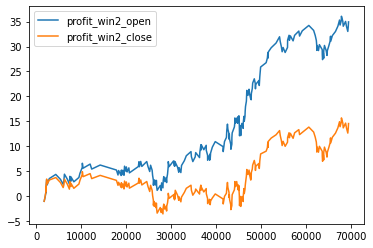

In [24]:
filtered_result_df = segmented_df.loc[
(segmented_df['expected_difference_loc'] <= -1.17) & (segmented_df['expected_difference'] <= -0.92)
]
utils.print_away_win_result(filtered_result_df)